In [2]:
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import imghdr
from PIL import Image
import seaborn as sns

In [9]:
image_exts=['jpeg','jpg','png']
data_dir='./fer2013/train'
for root,dir,files in os.walk(data_dir):
    for file in files:
        file_path=os.path.join(root,file)
        try:
            file_type=imghdr.what(file_path)
            if file_type not in image_exts:
                print(f'Image not in ext list {file_path}')
                os.remove(file_path)
        except Exception as e:
            print(e)
            os.remove(file_path)

In [10]:
train_dir='./fer2013/train'
test_dir='./fer2013/test'

In [11]:
def no_of_subdirs(directory,set_name):
    counts={}
    for item in os.listdir(directory):
        item_path=os.path.join(directory,item)
        if os.path.isdir(item_path):
            counts[item]=len(os.listdir(item_path))
    df=pd.DataFrame(counts,index=[set_name])
    return df

In [12]:
train_count=no_of_subdirs(train_dir,'train')
test_count=no_of_subdirs(test_dir,'test')
print(train_count)
print(test_count)

       surprise   sad  happy  neutral  disgust  fear  angry
train      3171  4830   7215     4965      436  4097   3995
      surprise   sad  happy  neutral  disgust  fear  angry
test       831  1247   1774     1233      111  1024    958


<Axes: >

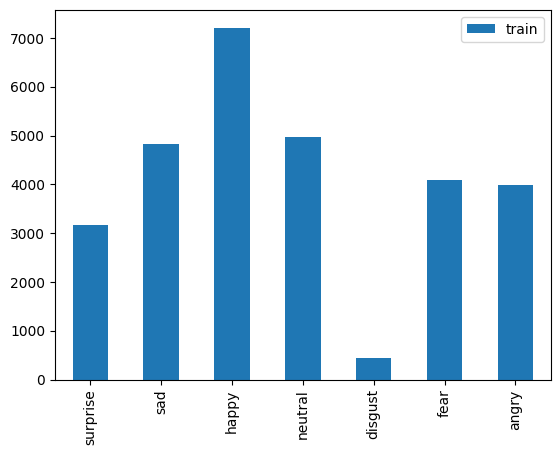

In [13]:
train_count.transpose().plot(kind='bar')

<Axes: >

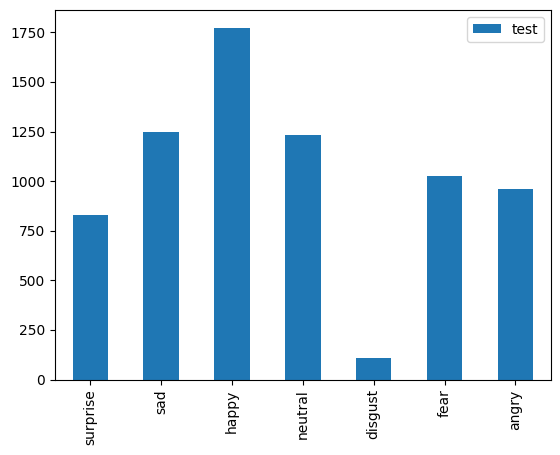

In [14]:
test_count.transpose().plot(kind='bar')

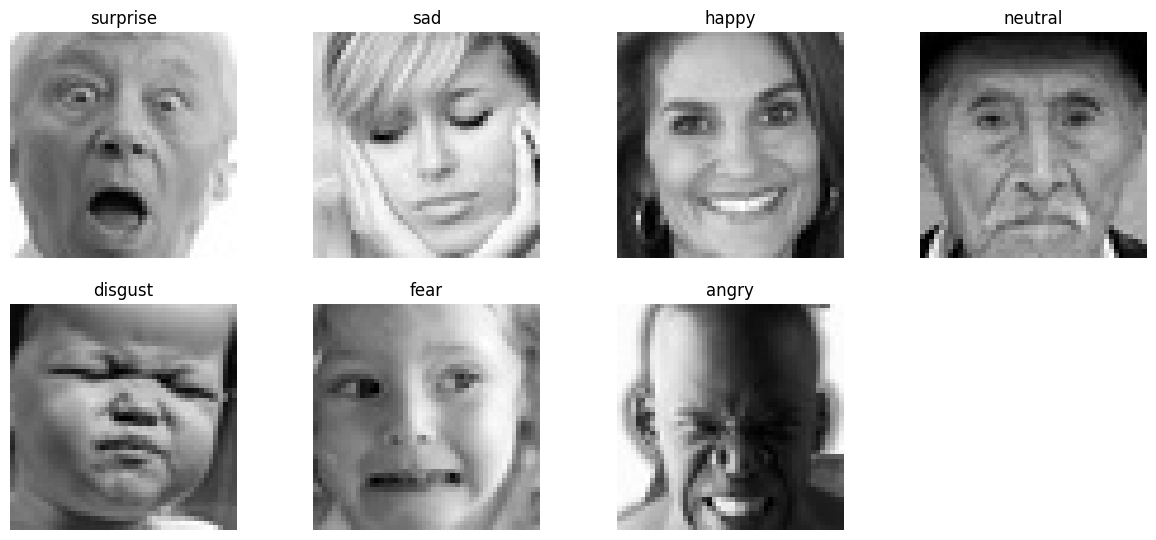

In [19]:
emotions=os.listdir(train_dir)
plt.figure(figsize=(15,10))
for i,emotion in enumerate(emotions,1):
    folder=os.path.join(train_dir,emotion)
    img_path=os.path.join(folder,os.listdir(folder)[22])
    img=plt.imread(img_path)
    plt.subplot(3,4,i)
    plt.imshow(img,cmap='gray')
    plt.title(emotion)
    plt.axis('off')

In [22]:
image_path='./fer2013/test/fear/PrivateTest_10306709.jpg'
img1=cv2.imread(image_path)
img=cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
print(img1.shape)
print(img.shape)

(48, 48, 3)
(48, 48)


In [23]:
from torchvision import transforms

def fer2013_preprocess(train=True):
  """
  Preprocesses FER-2013 data for training or validation.

  Args:
      train (bool, optional): If True, applies random horizontal flip for data augmentation (default: True).

  Returns:
      transforms.Compose: A PyTorch transform object for preprocessing.
  """
  transform_list = [
      transforms.ToTensor(),
      transforms.Normalize((0.5,), (0.5,))  
  ]
  if train:
    transform_list.append(transforms.RandomHorizontalFlip())  # Random horizontal flip for augmentation
  return transforms.Compose(transform_list)

/home/abhiram/Desktop/Abhiram/mainenv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
# Example usage
train_transform = fer2013_preprocess(train=True)
val_transform = fer2013_preprocess(train=False)

In [25]:
train_transform

Compose(
    ToTensor()
    Normalize(mean=(0.5,), std=(0.5,))
    RandomHorizontalFlip(p=0.5)
)